Standart olan kütüphaneleri import etme, veri setlerini çağırma ve veri setinde gerekli düzenlemeleri yapma işlemlerini gerçekleştirelim.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
median_house_hold_in_come = pd.read_csv("MedianHouseholdIncome2015.csv", encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv("PercentagePeopleBelowPovertyLevel.csv", encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv("PercentOver25CompletedHighSchool.csv", encoding="windows-1252")
share_race_city = pd.read_csv("ShareRaceByCity.csv", encoding="windows-1252")
kill = pd.read_csv("PoliceKillingsUS.csv", encoding="windows-1252")

In [3]:
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace = True)

In [4]:
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)

kill veri setinde bulunan manner_of_death sütunundaki her bir değerden kaç adet olduğunu bulalım.

In [5]:
kill.manner_of_death.value_counts()

shot                2363
shot and Tasered     172
Name: manner_of_death, dtype: int64

Çıktıyı okuyalım. 2363 tane shot değeri ve 172 tane shot and Tasered değeri bulunmakta. Bunu görselleştirmek için count plot kullanabiliriz.

In [6]:
kill.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

Çıktıyı okuyalım. 2428 tane M değeri ve 107 tane F değeri bulunmakta. Şimdi bu çıktıyı görselleştirelim.

C:\Users\raziy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'gender')

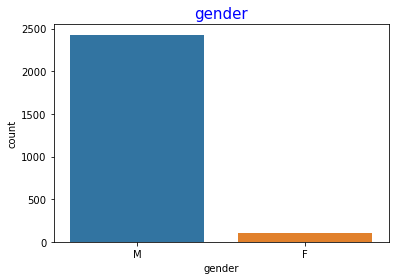

In [7]:
sns.countplot(kill.gender)
plt.title("gender",color = 'blue',fontsize=15)

Yukarıdaki kod bloğu ile gender sütununda bulunan her bir değerden kaç adet bulunduğu bilgisini görselleştirdim.

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
                ... 
hand torch         1
garden tool        1
pole               1
pick-axe           1
pen                1
Name: armed, Length: 68, dtype: int64


Text(0.5, 1.0, 'Kill weapon')

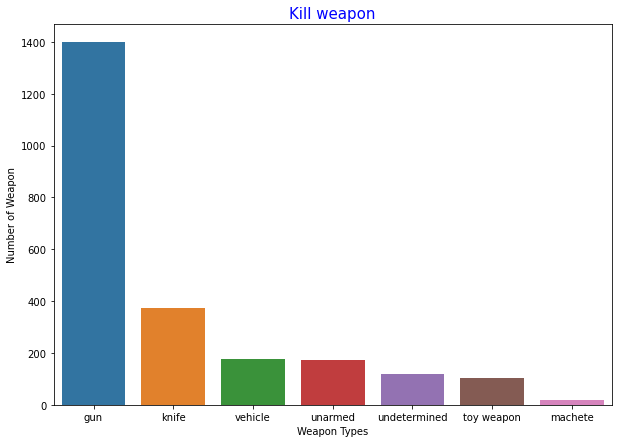

In [8]:
armed = kill.armed.value_counts()
print(armed)
plt.figure(figsize=(10,7))
sns.barplot(x=armed[:7].index,y=armed[:7].values)
plt.ylabel('Number of Weapon')
plt.xlabel('Weapon Types')
plt.title('Kill weapon',color = 'blue',fontsize=15)

Yukarıdaki kod bloğunu açıklayalım.

armed = kill.armed.value_counts() satırı ile kill veri setinin armed sütununda her bir değerden kaç adet bulunduğu bilgisine eriştim. Çıktıda, kullanılan her bir öldürme aletinden kaç adet olduğunu görebilirsiniz.

Bu sayısal ifadeleri count plot ile görselleştirdim. 

Öldürülen insanların yaşına dair bir görselleştirme yapalım.

Text(0.5, 1.0, 'Age of killed people')

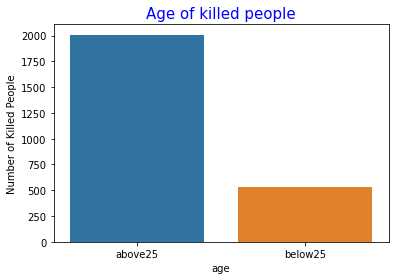

In [9]:
above25 =['above25' if i >= 25 else 'below25' for i in kill.age]
df = pd.DataFrame({'age':above25})
sns.countplot(x=df.age)
plt.ylabel('Number of Killed People')
plt.title('Age of killed people',color = 'blue',fontsize=15)

25 yaşının üstünde öldürülenlerin ve 25 yaşının altında öldürenlerin sayılarını görselleştirmek için "above25 =['above25' if i >= 25 else 'below25' for i in kill.age]" satırı ile filtre oluşturdum. Bu satırı okuyalım. kill.age şeklinde kill data'sının içerisinde age sütununun her bir değeri için bir döngü oluşturdum. Eğer age değeri 25'ten büyük ise above25 sınıfına, küçük ise below25 sınıfına aittir. Elde edilen değerleri above25 isimli liste içerisinde tutuyorum.

df = pd.DataFrame({'age':above25}) satırı ile bir data frame olluşturdum. Bu data frame'in üzerinde yaşı 25'ten küçük olup öldürülenler ve yaşı 25'ten büyük olup öldürülenler var.

sns.countplot(x=df.age) satırı ile count plot ile görselleştirme yapıyorum. 

Text(0.5, 1.0, 'Race of killed people')

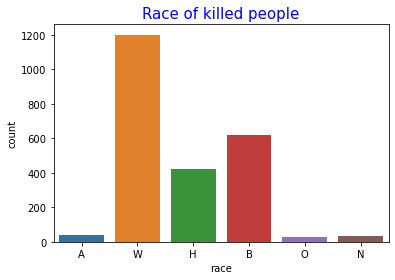

In [10]:
sns.countplot(data=kill, x='race')
plt.title('Race of killed people',color = 'blue',fontsize=15)

Yukarıdaki kod bloğu ile her bir ırka ait insan sayısını görselleştirdim.

Text(0.5, 1.0, 'Most dangerous cities')

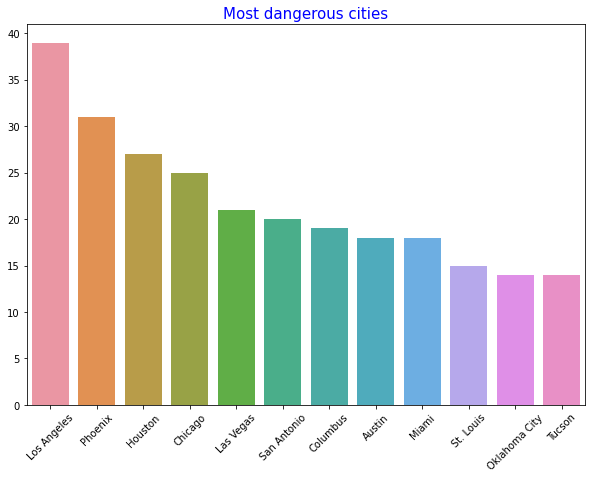

In [11]:
city = kill.city.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=city[:12].index,y=city[:12].values)
plt.xticks(rotation=45)
plt.title('Most dangerous cities',color = 'blue',fontsize=15)

Yukarıdaki kod bloğu ile en tehlikeli şehirleri bar plot ile görselleştirdim.

C:\Users\raziy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Having body cameras or not on Police')

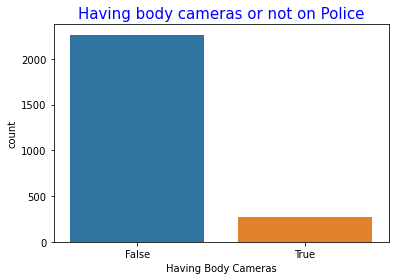

In [12]:
sns.countplot(kill.body_camera)
plt.xlabel('Having Body Cameras')
plt.title('Having body cameras or not on Police',color = 'blue',fontsize = 15)

Yukarıdaki kod bloğu ile polisler üzerinde kamera olup olmadığına dair bir görselleştirme yaptım.